In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import copy
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import math
import pandas as pd

# Herramientas de graficado

In [2]:
def searchSpace(objective,dsignParms):
  if len(dsignParms)==1:
    x = np.linspace(dsignParms[0][0], dsignParms[0][1], 30)
    z=np.zeros(x.shape)
    for index,value in enumerate(x):
      
      z[index]=objective([value])
    fig=plt.figure()  
    axes=fig.add_axes([0.1,0.1,0.8,0.8])
    axes.plot(x,z) 
    
  if len(dsignParms)==2:
    x = np.linspace(dsignParms[0][0], dsignParms[0][1], 30)
    y = np.linspace(dsignParms[1][0], dsignParms[1][1], 30)
    xv,yv = np.meshgrid(x, y)
  
    mi,mj=xv.shape
    z=np.zeros(xv.shape)
    for i in range(mi):
      for j in range(mj):
        z[i,j]=objective([xv[i,j],yv[i,j]])
    
    fig=plt.figure()  
    axes=Axes3D(fig)
    surf = axes.plot_surface(xv, yv, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
  return fig,axes

In [3]:
def solutionPrint(objective,fig, axes, Historic):
  if len(Historic[0])==1:
    x=list()
    z=list()
    for data in Historic: 
      z.append(objective(data))
      x.append(data)
    axes.plot(x,z,c='r',marker='h') 
    plt.show()
  if len(Historic[0])==2:
    x=list()
    y=list()
    z=list()
    for data in Historic:
      z.append(objective(data))
      x.append(data[0])
      y.append(data[1])
    #print(axes)
    axes.plot(x,y,z,c='r',marker='h') 
    
    plt.show()

In [4]:
def GrafHist(histObje):
  fig=plt.figure()  
  axes=fig.add_axes([0.1,0.1,0.8,0.8])
  axes.plot(histObje) 
  plt.show()

# Algoritmos de Optimización


## Simulated annealing

In [5]:
def SimulatedAnnealing(objective,dsignParms,vecino,algParam=False,
                       iterations=1000,Temperatura=4000,TempVar=20,
                       Alfatemp=0.85,case="minimo"):
  # selector de direccion 
  if case == "minimo":
    esMejor = lambda obNew,obOld : obNew < obOld
    form_func = lambda obNew,obOld,temperature :1/(exp((obNew-obOld)/temperature))
  elif case == "maximo":
    esMejor = lambda obNew,obOld : obNew > obOld
    form_func = lambda obNew,obOld,temperature :1/(exp((obOld-obNew)/temperature))
  else:
    esMejor = lambda obNew,obOld : obNew < obOld
    form_func = lambda obNew,obOld,temperature :1/(exp((obNew-obOld)/temperature))
  
  Historic=list()
  HistObjetives=list()
  temp=list()
  
  for i in range(iterations):
    new=copy.deepcopy(dsignParms)
    Historic.append(copy.deepcopy(new))
    HistObjetives.append(objective(new))
    for index,init in enumerate(dsignParms):
      new[index]=vecino(copy.deepcopy(dsignParms[index]),algParam)
    of_new=objective(new)
    of_current=objective(dsignParms)    
    ran_1 = np.random.rand()
    #form = 1/(exp((of_new-of_current)/Temperatura))
    form=form_func(of_new,of_current,Temperatura)
    if esMejor(of_new,of_current):
      #print("entro")
      
      dsignParms = copy.deepcopy(new)
    elif ran_1<form:
      #print("caso temperatura")
      #print(form)
      dsignParms = copy.deepcopy(new)
    if i%TempVar==0:
      temp.append(Temperatura)
      Temperatura = Alfatemp*Temperatura
      
    
      
  return Historic,HistObjetives,dsignParms

## Funciones de vecindad

In [6]:
def rndParamp(param,mu):
  ran_x_1 = np.random.rand()
  ran_x_2 = np.random.rand()
  if ran_x_1 >= 0.5:
    out = param + mu*ran_x_2
  else:
    out = param - mu*ran_x_2
  return out

# Planteamiento de problemas
## Plan de inversion

In [7]:
def planDeInversion(Parametros):
  '''Este modelo cálcula el retorno de un plan de inversión'''
  x=Symbol('x')
  A=(-(.001*x**2)) + (0.4*x) + (3.5) 
  objetivo=A.subs([[x,Parametros[0]]])
  
  return objetivo

In [8]:
planDeInversion([200])

43.5000000000000

## Cuadrados

In [9]:
def cuadrados(Parametros):
  '''Este modelo cálcula el área de un cuadrado tomando como base un hilo de 140cm'''

  x=Symbol('x')
  A=(((7)*(x**2))-(420*x)+9800)/8
  objetivo=A.subs([[x,Parametros[0]]])
  
  return objetivo

In [10]:
cuadrados([28])

441

## Problema Canaleta

In [11]:
def canaleta(Parametros):
  '''Este modelo el área de una canaleta con una lamina de 30 cm como base'''

  x=Symbol('x')
  A=(5*(20+20*cos(x))*sin(x))
  objetivo=A.subs([[x,Parametros[0]]])
  
  return objetivo

In [12]:
canaleta([math.pi/3])

129.903810567666

## Problema del área mínima de una caja de volumen fijo

In [13]:
def prob_caja_volumen_restringido(Parametros):
  '''Este modelo calcula el área de un prisma cuadrado con un volumen fijo 
  de 216 milímetros '''
  #definición de los objetivos
  x=Symbol('x')
  A=(864/x)+x**2
  objetivo=A.subs([[x,Parametros[0]]])
  
  return objetivo

In [14]:
prob_caja_volumen_restringido([41])

69785/41

## Problema elipse

In [15]:
def prob_elipse(Parametros):
  ''' modelo de la elipse'''
  #definición de los objetivos
  x=Symbol('x')
  y=Symbol('y')

  A=x**2+y**2
  objetivo=A.subs([[x,Parametros[0]],[y,Parametros[1]]])
  
  return objetivo

In [16]:
prob_elipse([3,4])

25

#  Resolución de problemas  con simulado recocido

## Problema del área mínima de una caja de volumen fijo SA

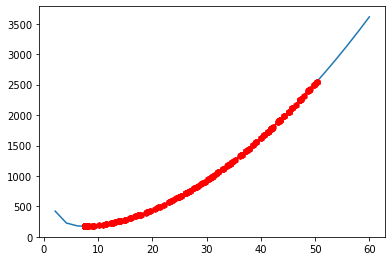

6304398523], [45.12616304398523], [45.12616304398523], [45.12616304398523], [44.293690836396685], [44.293690836396685], [44.293690836396685], [43.586476445703425], [43.586476445703425], [43.586476445703425], [43.52859014089029], [43.52859014089029], [43.52859014089029], [43.52859014089029], [43.419009990990425], [43.3306296767544], [43.3306296767544], [43.3306296767544], [43.3306296767544], [43.3306296767544], [43.3306296767544], [43.13247957792945], [43.13247957792945], [42.2217968402476], [42.04708780748455], [42.04708780748455], [42.04708780748455], [42.0245068227112], [42.0245068227112], [42.0245068227112], [42.0245068227112], [42.0245068227112], [41.86322873435342], [41.86322873435342], [41.86322873435342], [41.86322873435342], [41.86322873435342], [41.86322873435342], [41.22966625803371], [41.22966625803371], [41.22966625803371], [41.22966625803371], [41.22966625803371], [40.631796135818185], [40.631796135818185], [40.631796135818185], [40.08073395804078], [40.08073395804078], [3

In [240]:
Historic,HistObjetives,solution=SimulatedAnnealing(prob_caja_volumen_restringido,[50],rndParamp,
                                                   algParam=1,iterations=1000,
                                                   Temperatura=100,
                                                   TempVar=2,Alfatemp=0.1)
fig,axes=searchSpace(prob_caja_volumen_restringido,[[0,60]])
solutionPrint(prob_caja_volumen_restringido,fig, axes, Historic)
print(Historic)
print(solution)

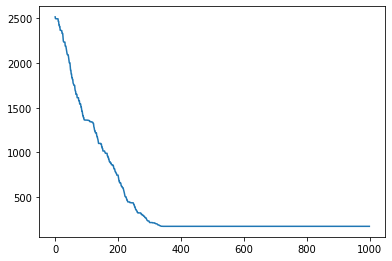

In [59]:
GrafHist(HistObjetives)

## Plan de inversión SA

entro


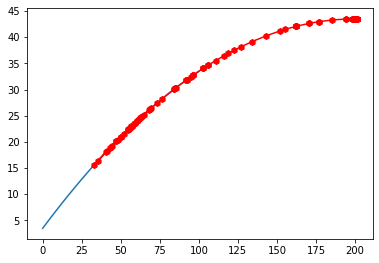

[[200.047835351756], [200.047835351756], [200.047835351756], [200.047835351756], [200.047835351756], [200.047835351756], [200.047835351756], [200.047835351756], [200.047835351756], [200.047835351756]]


In [262]:
Historic,HistObjetives,solution=SimulatedAnnealing(planDeInversion,[50],rndParamp,
                                                   algParam=10,iterations=200,
                                                   Temperatura=400,
                                                   TempVar=5,Alfatemp=.5, case = 'maximo')


fig,axes=searchSpace(planDeInversion,[[0,100]])
solutionPrint(planDeInversion,fig, axes, Historic)
print(Historic[-10:])

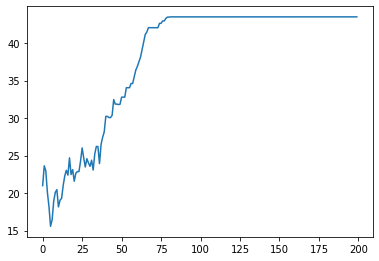

In [263]:
GrafHist(HistObjetives)

## Cuadrados SA

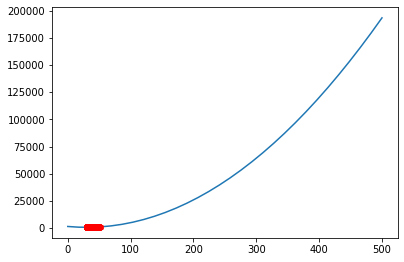

[[29.998311015181017], [29.998311015181017], [29.998311015181017], [29.998311015181017], [29.998311015181017], [29.998311015181017], [29.998311015181017], [29.998311015181017], [29.998311015181017], [29.998311015181017]]


In [260]:
Historic,HistObjetives,solution=SimulatedAnnealing(cuadrados,[50],rndParamp,
                                                   algParam=.5,iterations=500,Temperatura=400,
                                                   TempVar=10,Alfatemp=.1)

fig,axes=searchSpace(cuadrados,[[0,500]])
solutionPrint(cuadrados,fig, axes, Historic)
print(Historic[-10:])


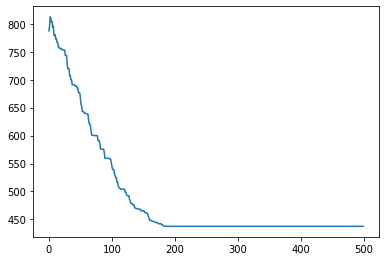

In [261]:
GrafHist(HistObjetives)

## Canaleta SA

entro


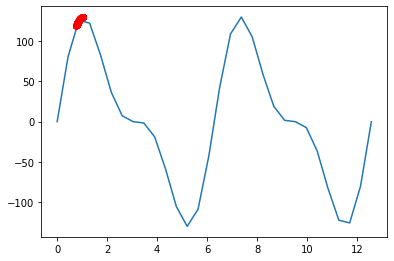

[[1.0472101895045125], [1.0472101895045125], [1.0472101895045125], [1.0472101895045125], [1.0472101895045125], [1.0472101895045125], [1.0472101895045125], [1.0472101895045125], [1.0472101895045125], [1.0472101895045125]]


In [294]:
Historic,HistObjetives,solution=SimulatedAnnealing(canaleta, [math.pi/4],rndParamp,
                                                   algParam=.01,iterations=1000,Temperatura=400,
                                                   TempVar=100,Alfatemp=.01, case = 'maximo')

fig,axes=searchSpace(canaleta,[[0,(4*math.pi)]])
solutionPrint(canaleta,fig, axes, Historic)

print(Historic[-10:])

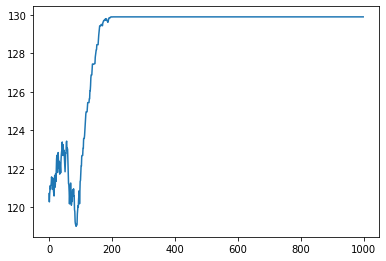

In [295]:
GrafHist(HistObjetives)